<a href="https://colab.research.google.com/github/FerdyBerlianoP/Stock-Data-Analysis-with-LSTM/blob/master/Stock_Data_Analyst_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 10.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from datetime import datetime

In [2]:
# df=pd.read_csv("/kaggle/input/tesla-inc-tsla-stock-price/TSLA.csv")
df = yf.Ticker("AAPL").history(period="5y")
# df['weekday'] = df.index.weekday
# df['month_year'] = df.index.to_period('M')
# friday_groupy = df[df['weekday'] == 4].groupby(['month_year'])
#df.tail(10)
AAPL=df
company_list = [AAPL]
company_name = ["AAPL"]
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,company_name
Date,,,,,,,,
2023-01-19 00:00:00-05:00,134.080002,136.250000,133.770004,135.270004,58280400,0.0,0.0,AAPL
2023-01-20 00:00:00-05:00,135.279999,138.020004,134.220001,137.869995,79972200,0.0,0.0,AAPL
2023-01-23 00:00:00-05:00,138.119995,143.320007,137.899994,141.110001,81760300,0.0,0.0,AAPL
2023-01-24 00:00:00-05:00,140.309998,143.160004,140.300003,142.529999,66435100,0.0,0.0,AAPL
2023-01-25 00:00:00-05:00,140.889999,142.429993,138.809998,141.860001,65799300,0.0,0.0,AAPL
2023-01-26 00:00:00-05:00,143.169998,144.250000,141.899994,143.960007,54105100,0.0,0.0,AAPL
2023-01-27 00:00:00-05:00,143.160004,147.229996,143.080002,145.929993,70492800,0.0,0.0,AAPL
2023-01-30 00:00:00-05:00,144.960007,145.550003,142.850006,143.000000,64015300,0.0,0.0,AAPL
2023-01-31 00:00:00-05:00,142.699997,144.339996,142.279999,144.289993,65874500,0.0,0.0,AAPL


In [4]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000
mean,98.369621,99.576617,97.216050,98.444613,1.159344e+08,0.003217,0.003180
std,46.355858,46.951476,45.749006,46.372754,5.512436e+07,0.025442,0.112777
min,34.741500,35.161353,34.263739,34.309586,3.519590e+07,0.000000,0.000000
25%,50.168708,50.552665,49.648004,50.225144,7.896902e+07,0.000000,0.000000
50%,103.432772,108.697292,102.638690,105.528934,1.012478e+08,0.000000,0.000000
75%,142.327868,143.839035,140.625748,142.462681,1.356616e+08,0.000000,0.000000
max,181.576172,181.884380,178.086416,180.959732,4.265100e+08,0.230000,4.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2018-02-02 00:00:00-05:00 to 2023-02-01 00:00:00-05:00
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1258 non-null   float64
 1   High          1258 non-null   float64
 2   Low           1258 non-null   float64
 3   Close         1258 non-null   float64
 4   Volume        1258 non-null   int64  
 5   Dividends     1258 non-null   float64
 6   Stock Splits  1258 non-null   float64
 7   company_name  1258 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 88.5+ KB


In [6]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'company_name'],
      dtype='object')

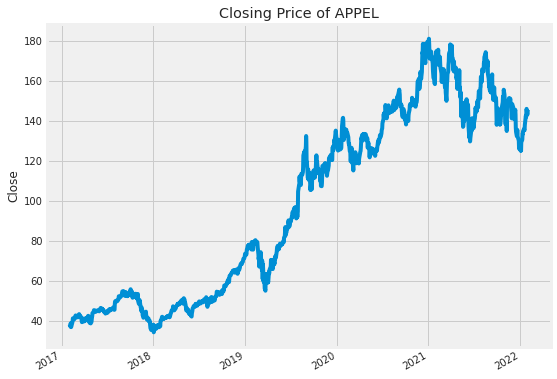

In [10]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title("Closing Price of APPEL")
  
    
plt.tight_layout()

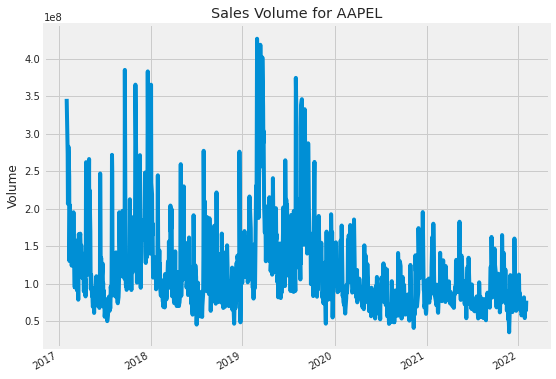

In [12]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title("Sales Volume for AAPEL")
    
plt.tight_layout()